CH12 - Q10) In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data

a)

In [12]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of observations per class and number of variables
n_samples = 20
n_features = 50

# Generate data for three classes
# Class 1 (mean = 0)
class_1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))

# Class 2 (mean = 3)
class_2 = np.random.normal(loc=3, scale=1, size=(n_samples, n_features))

# Class 3 (mean = -3)
class_3 = np.random.normal(loc=-3, scale=1, size=(n_samples, n_features))

# Combine the classes into a single dataset
X = np.vstack([class_1, class_2, class_3])

# True class labels
y_true = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)



b)

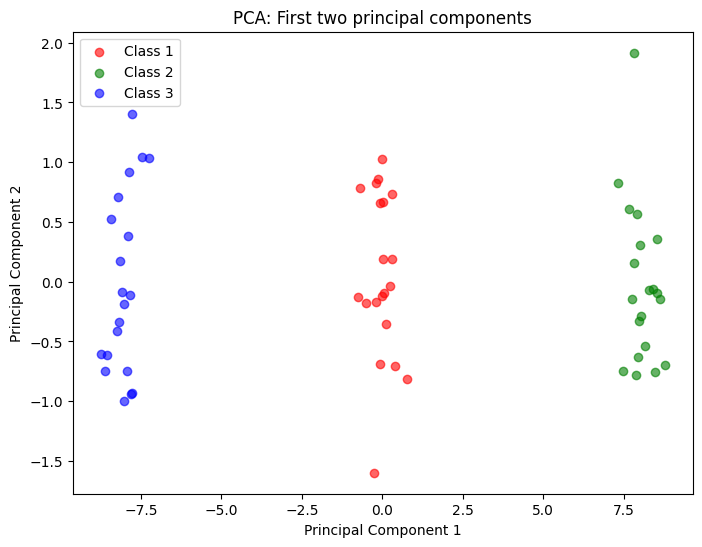

Explained variance by first two components: [0.86925829 0.00943817]


In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the first two principal components
plt.figure(figsize=(8,6))

# Scatter plot, color by true class labels
plt.scatter(X_pca[y_true == 0, 0], X_pca[y_true == 0, 1], label='Class 1', color='r', alpha=0.6)
plt.scatter(X_pca[y_true == 1, 0], X_pca[y_true == 1, 1], label='Class 2', color='g', alpha=0.6)
plt.scatter(X_pca[y_true == 2, 0], X_pca[y_true == 2, 1], label='Class 3', color='b', alpha=0.6)

# Labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First two principal components')
plt.legend()

plt.show()

# Check the explained variance of each component
print(f"Explained variance by first two components: {pca.explained_variance_ratio_}")


c)

In [14]:
from sklearn.cluster import KMeans
import pandas as pd

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Compare the K-means clusters with the true class labels
# The labels from K-means might not correspond to the true labels, so we use pd.crosstab()
comparison_table = pd.crosstab(y_true, kmeans_labels, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the comparison table
print("Comparison of True Class Labels and K-means Cluster Assignments:")
print(comparison_table)


Comparison of True Class Labels and K-means Cluster Assignments:
K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0


d)

In [15]:
# Perform K-means clustering with K=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_labels_2 = kmeans_2.fit_predict(X_scaled)

# Compare the K-means clusters with the true class labels
comparison_table_2 = pd.crosstab(y_true, kmeans_labels_2, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the comparison table
print("Comparison of True Class Labels and K-means Cluster Assignments (K=2):")
print(comparison_table_2)


Comparison of True Class Labels and K-means Cluster Assignments (K=2):
K-means Cluster   0   1
True Class             
0                 0  20
1                20   0
2                 0  20


K=2 vs True Classes: Since the original dataset has three distinct classes, K-means with K=2 might group some of the true classes together, which means one cluster may contain data points from multiple true classes. For example, the algorithm might group class 1 and class 2 into the same cluster because of their proximity in the feature space.

Potential result: You might see that K-means assigns one of the clusters to a mix of two original classes (e.g., classes 0 and 1) while assigning the other cluster predominantly to the third class (e.g., class 2). This would suggest that two of the classes are not very well separated in the 50-dimensional space, and the algorithm couldn't fully distinguish between them when forced to create only two clusters.


e)

In [18]:
# Perform K-means clustering with K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_labels_4 = kmeans_4.fit_predict(X_scaled)

# Compare the K-means clusters with the true class labels
comparison_table_4 = pd.crosstab(y_true, kmeans_labels_4, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the comparison table
print("Comparison of True Class Labels and K-means Cluster Assignments (K=4):")
print(comparison_table_4)


Comparison of True Class Labels and K-means Cluster Assignments (K=4):
K-means Cluster  0   1   2   3
True Class                    
0                0   0  20   0
1                8   0   0  12
2                0  20   0   0


Over-clustering: Since the data originally consists of 3 distinct classes, but we are asking K-means to find 4 clusters, the algorithm may split one or more classes into multiple clusters. This is known as "over-clustering."

Cross-tabulation: The output table will show how many observations from each true class have been assigned to each of the 4 clusters. Ideally, if a cluster aligns well with a true class, most observations from that class should fall into a single cluster. However, with K=4, you might observe one of the true classes being split into two clusters, indicating that K-means is "forcing" the creation of an additional cluster that doesn't naturally exist in the data.

f)

Comparison of True Class Labels and K-means Cluster Assignments (K=3) on PCA-reduced data:
K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0


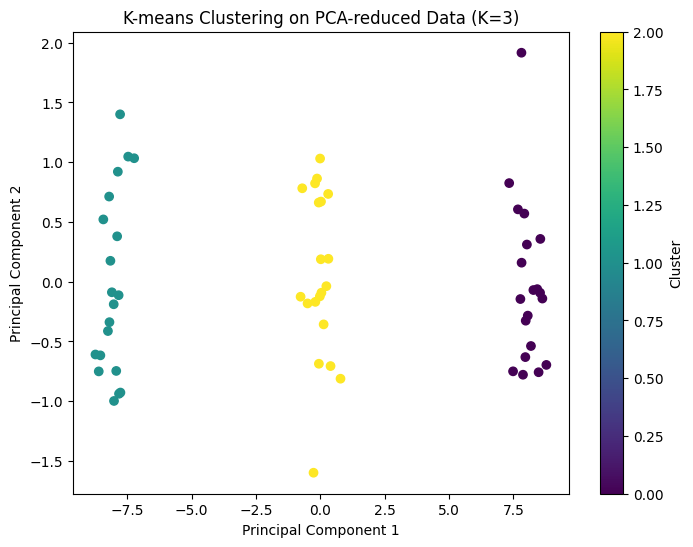

In [19]:
# Perform K-means clustering with K=3 on the first two principal components (PCA data)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca)  # X_pca contains the first two principal components

# Compare the K-means clusters (on PCA data) with the true class labels
comparison_table_pca = pd.crosstab(y_true, kmeans_labels_pca, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the comparison table
print("Comparison of True Class Labels and K-means Cluster Assignments (K=3) on PCA-reduced data:")
print(comparison_table_pca)

# Plot the clusters from K-means on the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, cmap='viridis', label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-reduced Data (K=3)')
plt.colorbar(label='Cluster')
plt.show()


PCA and Dimensionality Reduction: By using only the first two principal components, we capture the majority of the data's variance in a reduced space. Clustering on this reduced space simplifies the problem but may also lose some information compared to the original 50-dimensional dataset.

Cluster Alignment: Ideally, K-means clustering on the PCA-reduced data should group the observations in a way that still reflects the underlying class structure. If the clustering results are similar to the clustering on the original data, it means the first two principal components have preserved most of the class-distinguishing information. However, if the results differ significantly, it may indicate that the first two principal components do not capture enough information to separate the classes effectively.

g)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the data to have mean 0 and std 1

# Step 2: Perform K-means clustering with K=3 on the standardized data
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_labels_scaled = kmeans_scaled.fit_predict(X_scaled)

# Step 3: Compare the K-means clusters (on standardized data) with the true class labels
comparison_table_scaled = pd.crosstab(y_true, kmeans_labels_scaled, rownames=['True Class'], colnames=['K-means Cluster'])

# Print the comparison table
print("Comparison of True Class Labels and K-means Cluster Assignments (K=3) on Standardized Data:")
print(comparison_table_scaled)

# Optional: Check the inertia (within-cluster sum of squares) to measure how well K-means performed
print(f"K-means inertia (on standardized data): {kmeans_scaled.inertia_}")


Comparison of True Class Labels and K-means Cluster Assignments (K=3) on Standardized Data:
K-means Cluster   0   1   2
True Class                 
0                 0   0  20
1                20   0   0
2                 0  20   0
K-means inertia (on standardized data): 394.23236435471705


Explanation:

1) Standardization:

The StandardScaler() scales each variable (each of the 50 features in the dataset) to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the distance metric used by K-means clustering. Without scaling, variables with larger ranges might dominate the clustering process.

2) K-means Clustering:

We perform K-means clustering with K=3 on the scaled data (X_scaled), expecting three clusters (corresponding to the three true classes).

3) Comparison:

The pd.crosstab() function compares the cluster assignments from K-means with the true class labels, similar to part (b). This will help us evaluate how well the clustering performed after standardization.
Inertia:

4) Inertia:

Inertia is a metric that measures the within-cluster sum of squares (how tightly the data points are clustered). Lower inertia typically indicates better clustering.


Comparison with (b):

Standardization Impact: In part (b), the clustering was performed on the raw data, where each variable might have had different scales. This could have caused features with larger ranges to disproportionately influence the clustering results. Standardizing the data ensures that all features contribute equally to the clustering process.

Cluster Alignment: You can compare the results from this standardized clustering with the results from part (b) by looking at how well the clusters align with the true classes. If the clustering improves after standardization, it suggests that scaling the data helped the algorithm better capture the structure of the data.